# <span style="color:blue"> NSL Exercise lesson 5. </span> 

## <span style="color:red"> Exercise 5.1. </span>

The aim of this lesson is implementing Metropolis algorithm in order to sample the probability distribution $|\Psi(\vec{r},t)|^2$ of a non-relativistic single spinless hydrogen atom's electron in three spatial dimensions. In particular, knowing that the hydrogen ground state is described by the wave function

$$ \Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} $$

while for the first excited state 

$$ \Psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$$

it is required to extimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$, being aware that for the previous choice of wave functions expectation values for the radius turn out to be exactly: 

$$\left\langle r\right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0 \quad \left\langle r\right\rangle_{\Psi_{2,1,0}} = 5 a_0$$

where $a_0$ is Bohr radius.

Below you can find the first two plots obtained using an uniform transition probability $T(\vec{x}|\vec{y})$ with a step chosen in such a way that it is almost sure to obtain 50% acceptance. This simulation was repeated $10^6$ times in $100$ blocks, in order to implement the blocking method to obtain an estimate of the uncertainties, as you can find in the attached C++ code. All results are represented in Bohr radius units.

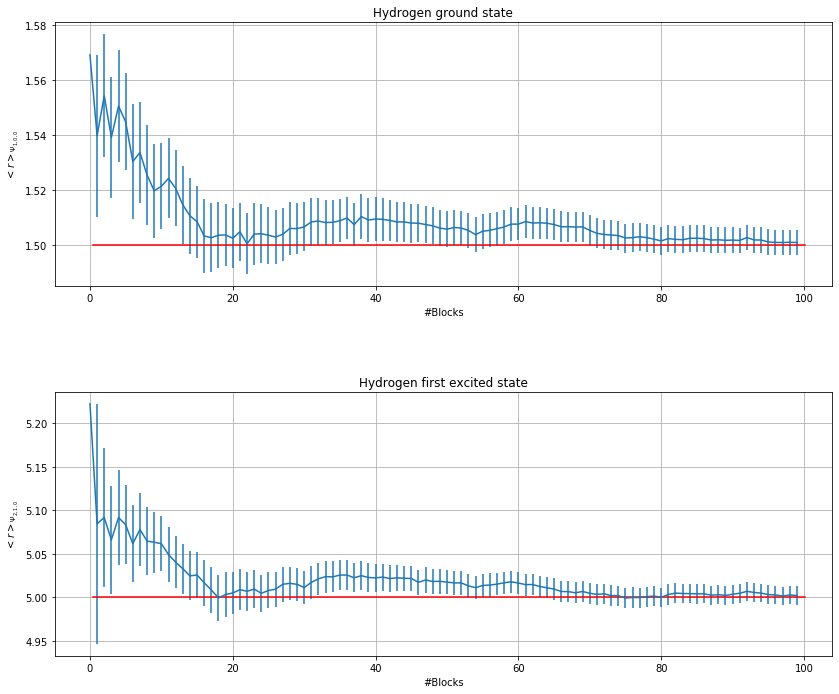

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, s, s_err, p, p_err = np.loadtxt("Datas/data_unif.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

f,ax=plt.subplots(2)

ax[0].errorbar(x, s, yerr=s_err)
ax[0].axhline(y=1.5,xmin=0.05, xmax=0.965,color='r',linestyle='-')
ax[0].set_title("Hydrogen ground state")
ax[0].set(xlabel="#Blocks", ylabel="$<r>_{\Psi_{1,0,0}}$")
ax[0].grid(True)

ax[1].errorbar(x, p, yerr=p_err)
ax[1].axhline(y=5.,xmin=0.05, xmax=0.965,color='r',linestyle='-')
ax[1].set_title("Hydrogen first excited state")
ax[1].set(xlabel="#Blocks", ylabel="$<r>_{\Psi_{2,1,0}}$")
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()  

As you can clearly see, both simulations converge to the expected mean value of the radius within one standard deviation.

- What do you observe when you start very far from the origin?

Clearly, if we start very far from the origin we can't expect to obtain the same kind of result with the same number of simulations and blocks. In other words, we should equilibrate the system before taking any measure, which means making preliminary simulations untill we are in a decent neighborhood of the expected radius value. This is not the case of all our simulations since it was chosen the origin $(0,0,0)$ as starting point. This choice lets the system to be in a neighborhood of all the expected mean values.

However, in the plot below you can see that if we choose $(100,100,100)$ as starting point of our simulations, the results change. In fact, for the $1s$ state we need at least $10^3$ steps to equilibrate the system, while for the $2d$ orbital more or less $500$ steps are required (neglecting the fact that the average values for the radius are different from the expected ones due to a lack of equilibration, i.e. the algorithm is still using all the values to compute an extimation of the radius).

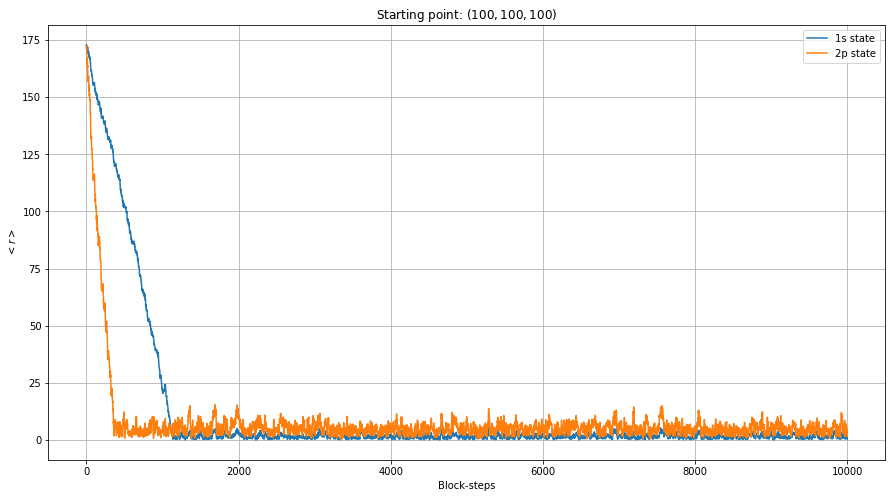

In [2]:
plt.figure(figsize = (15, 8))

far_1s = np.loadtxt("Datas/sampled_point.dat", max_rows=10000)
far_2p = np.loadtxt("Datas/sampled_point.dat", skiprows=10000)

plt.title("Starting point: $(100,100,100)$")
plt.xlabel('Block-steps')
plt.ylabel('$< r >$')
plt.plot(far_1s, label="1s state")
plt.plot(far_2p, label="2p state")
plt.grid(True)
plt.legend()

plt.show()

- How large should be the number of Monte Carlo Metropolis steps in each block?

In order to give an answer to this question, we have to consider the correlation times (typical time scale on which the autocorrelations drops off) of our simulations. However, since it isn't explicitly required to compute the autocorrelations, here we give only give a qualitative answer. Certainly, in general, the autocorrelation decreases exponentially at long time. Therefore, we should expect that $10^4$ block-steps could be a safe choice for all the simulations. 

Then the simulation is repeated again with the previous choices of parameters. However, this time it was requested to use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each cartesian coordinate. The results are showed below in Bohr radius units.

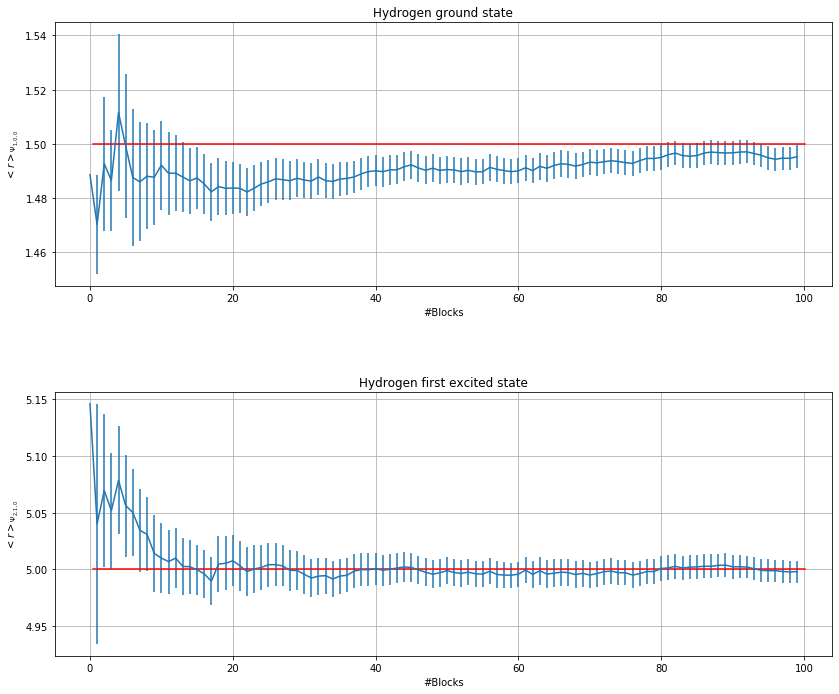

In [3]:
x, s, s_err, p, p_err = np.loadtxt("Datas/data_gauss.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

f,ax=plt.subplots(2)

ax[0].errorbar(x, s, yerr=s_err)
ax[0].axhline(y=1.5,xmin=0.05, xmax=0.965,color='r',linestyle='-')
ax[0].set_title("Hydrogen ground state")
ax[0].set(xlabel="#Blocks", ylabel="$<r>_{\Psi_{1,0,0}}$")
ax[0].grid(True)

ax[1].errorbar(x, p, yerr=p_err)
ax[1].axhline(y=5.,xmin=0.05, xmax=0.965,color='r',linestyle='-')
ax[1].set_title("Hydrogen first excited state")
ax[1].set(xlabel="#Blocks", ylabel="$<r>_{\Psi_{2,1,0}}$")
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()  

Again, as the number of blocks increases, it is clear that the Metropolis algorithm converges at most within $2\sigma$ to the expected mean values. Also we can safely say that there are no differences between the first simulation (uniform probability transition) and the second one (gaussian probability transition).

Finally, using the provided python code, $10^4$ cartesian points are used to draw a 3D picture of both $1s$ and $2p$ orbitals. As expected you should note how $1s$ picture resembles a sphere, while the $2p$ plot is two-folded.

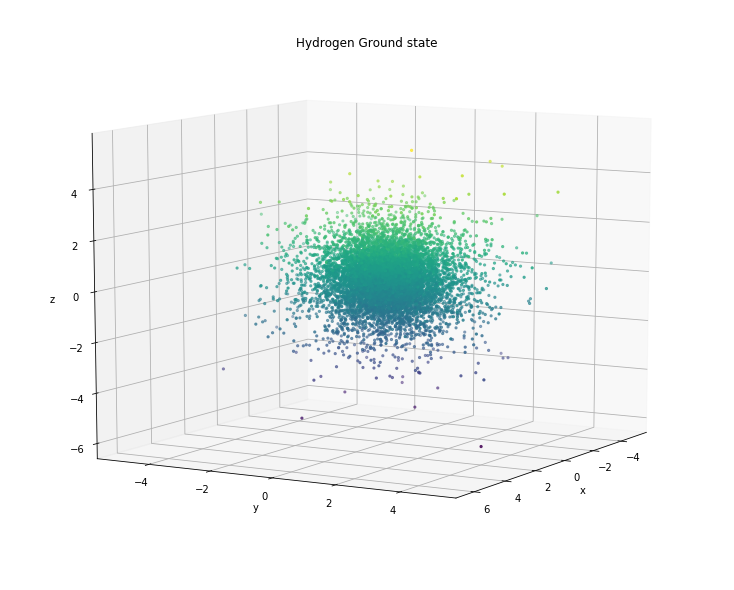

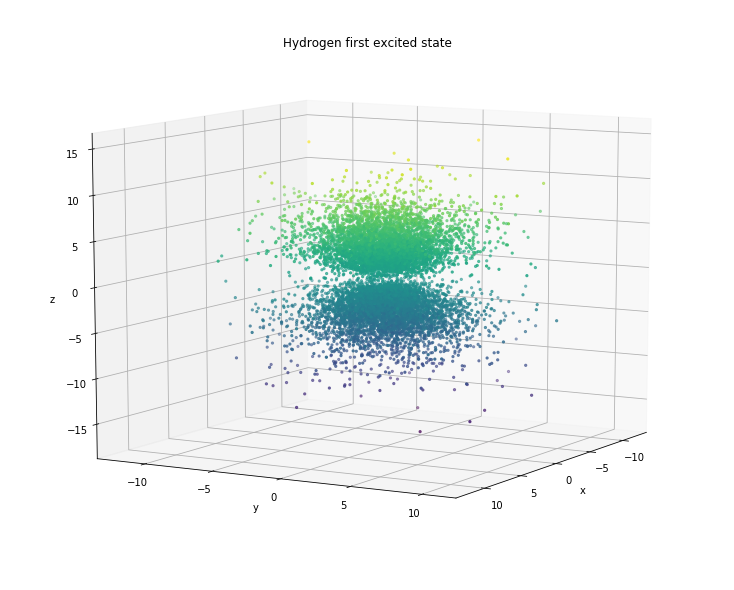

In [4]:
from mpl_toolkits.mplot3d import Axes3D

x_1s, y_1s, z_1s = np.loadtxt("Datas/pointS.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x_2p, y_2p, z_2p = np.loadtxt("Datas/pointP.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(1, figsize=(10, 8))
ax=Axes3D(fig)
ax.scatter(x_1s, y_1s, z_1s, c=z_1s, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Hydrogen Ground state")

fig=plt.figure(2, figsize=(10, 8))
ax=Axes3D(fig)
ax.scatter(x_2p, y_2p, z_2p, c=z_2p, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Hydrogen first excited state")

plt.show()